In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import sklearn.metrics as sm

In [5]:
get_ipython().run_line_magic('matplotlib', 'inline')

In [13]:
heart_disease_dataset = pd.read_csv('heart_cleveland_upload.csv')

In [14]:
heart_disease_dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [15]:
heart_disease_dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [16]:
sum(heart_disease_dataset.isnull().sum())

0

In [19]:
heart_disease_dataset.groupby(['condition']).describe()

age                                                        sex  \
           count       mean       std   min    25%   50%   75%   max  count   
condition                                                                     
0          160.0  52.643750  9.551151  29.0  44.75  52.0  59.0  76.0  160.0   
1          137.0  56.759124  7.899670  35.0  53.00  58.0  62.0  77.0  137.0   

                     ...   ca        thal                                     \
               mean  ...  75%  max  count      mean       std  min  25%  50%   
condition            ...                                                       
0          0.556250  ...  0.0  3.0  160.0  0.375000  0.758599  0.0  0.0  0.0   
1          0.817518  ...  2.0  3.0  137.0  1.372263  0.882904  0.0  0.0  2.0   

                     
           75%  max  
condition            
0          0.0  2.0  
1          2.0  2.0  

[2 rows x 104 columns]

In [24]:
print((heart_disease_dataset[['cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']] == 0).sum())

cp           23
trestbps      0
chol          0
fbs         254
restecg     147
thalach       0
exang       200
oldpeak      96
slope       139
ca          174
thal        164
dtype: int64


In [25]:
heart_disease_dataset[['cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]

,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0,160,234,1,2,131,0,0.1,1,1,0
1,0,140,239,0,0,151,0,1.8,0,2,0
2,0,150,226,0,0,114,0,2.6,2,0,0
3,0,138,282,1,2,174,0,1.4,1,1,0
4,0,110,211,0,2,144,1,1.8,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
292,3,152,223,0,0,181,0,0.0,0,0,2
293,3,118,219,0,0,140,0,1.2,1,0,2
294,3,120,198,0,0,130,1,1.6,1,0,2
295,3,138,183,0,0,182,0,1.4,0,0,0


In [28]:
heart_disease_dataset.fillna(heart_disease_dataset.mean(), inplace = True)

In [29]:
print(heart_disease_dataset.isnull().sum())

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


In [30]:
heart_disease_dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
labelencoder = LabelEncoder()

In [43]:
dataTrans = heart_disease_dataset.copy()

In [84]:
for data in heart_disease_dataset.columns:dataTrans[data] = labelencoder.fit_transform(heart_disease_dataset[data])

In [85]:
dataTrans

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,35,1,0,40,65,1,2,31,0,1,1,1,0,0
1,35,0,0,28,69,0,0,50,0,17,0,2,0,0
2,32,0,0,34,57,0,0,15,0,25,2,0,0,0
3,31,1,0,27,108,1,2,73,0,14,1,1,0,1
4,30,1,0,8,42,0,2,43,1,17,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,6,1,3,35,54,0,0,79,0,0,0,0,2,1
293,5,1,3,13,50,0,0,39,0,12,1,0,2,1
294,2,1,3,14,30,0,0,30,1,16,1,0,2,1
295,2,0,3,27,19,0,0,80,0,14,0,0,0,0


In [46]:
X = dataTrans.drop(['condition'], axis = 1)

In [47]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0


In [48]:
Y = dataTransform['condition']

In [49]:
Y

0      0
1      0
2      0
3      1
4      0
      ..
292    1
293    1
294    1
295    0
296    1
Name: condition, Length: 297, dtype: int64

In [50]:
heart_feature_list = list(X.columns)

In [51]:
heart_feature_list

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [54]:
Y_test

167    1
211    1
63     0
154    0
5      0
77     0
183    1
158    1
9      0
139    0
285    0
78     0
92     0
101    0
42     0
222    1
283    1
33     1
263    1
148    0
245    1
45     1
60     0
46     0
278    0
237    1
175    1
234    1
17     0
279    1
111    0
219    1
24     0
82     0
7      1
75     1
108    0
84     0
90     0
73     0
116    0
126    1
233    0
59     0
195    1
208    1
97     0
185    1
176    0
124    0
93     1
294    1
182    1
275    0
192    1
292    1
25     0
224    1
6      0
181    1
Name: condition, dtype: int64

In [55]:
Y_train

273    1
259    1
30     0
22     0
277    1
      ..
188    0
71     0
106    1
270    1
102    0
Name: condition, Length: 237, dtype: int64

In [56]:
X_train.shape

(237, 13)

In [57]:
Y_train.shape

(237,)

In [58]:
X_test.shape

(60, 13)

In [59]:
Y_test.shape

(60,)

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
randomforestclassifier = RandomForestClassifier(n_estimators = 1100)

In [62]:
randomforestclassifier.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=1100)

In [63]:
prediction_y = randomforestclassifier.predict(X_test)

In [64]:
prediction_y

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1], dtype=int64)

In [67]:
experiment_accuracy = sm.accuracy_score(Y_test, prediction_y)
print('Accuracy Score is : ', experiment_accuracy)

Accuracy Score is :  0.7166666666666667


In [68]:
from sklearn import metrics

In [69]:
print('Classification Report : ', metrics.classification_report(prediction_y, Y_test, target_names = ["Heart Safe", "Heart Disease"]))

Classification Report :                 precision    recall  f1-score   support

   Heart Safe       0.72      0.74      0.73        31
Heart Disease       0.71      0.69      0.70        29

     accuracy                           0.72        60
    macro avg       0.72      0.72      0.72        60
 weighted avg       0.72      0.72      0.72        60



In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
import seaborn as sb

<AxesSubplot:xlabel='sex', ylabel='count'>

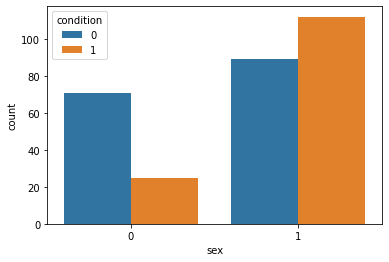

In [72]:
sb.countplot(x='sex', hue='condition', data=heart_disease_dataset)

<AxesSubplot:xlabel='thal', ylabel='count'>

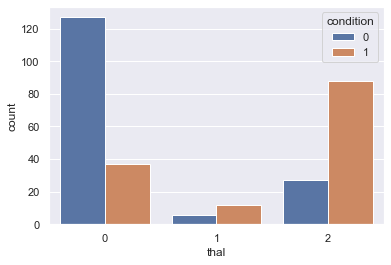

In [86]:
sb.countplot(x='thal', hue='condition', data=heart_disease_dataset)

<AxesSubplot:xlabel='cp', ylabel='count'>

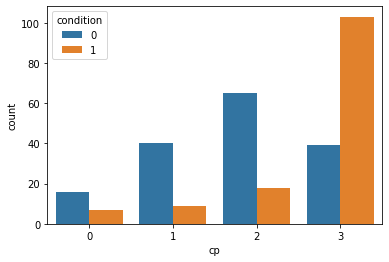

In [73]:
sb.countplot(x='cp', hue='condition', data=heart_disease_dataset)

<AxesSubplot:xlabel='age', ylabel='trestbps'>

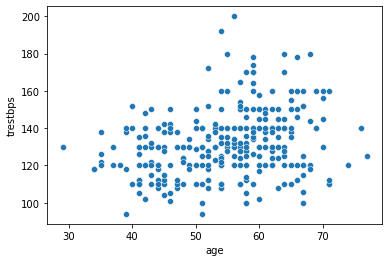

In [74]:
sb.scatterplot(x="age", y="trestbps", data=heart_disease_dataset)

<AxesSubplot:xlabel='fbs', ylabel='trestbps'>

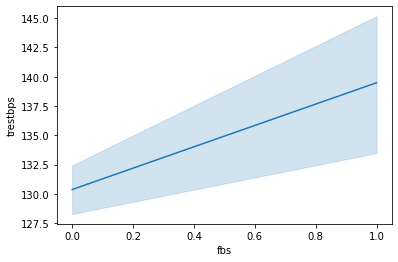

In [77]:
sb.lineplot(data=heart_disease_dataset, x="fbs", y="trestbps")

In [78]:
sb.set()

In [79]:
get_ipython().run_line_magic('matplotlib', 'inline')

In [80]:
import matplotlib.pyplot as pt

In [81]:
confusionmt = confusion_matrix(Y_test, prediction_y)

Text(89.18, 0.5, 'predicted class axis')

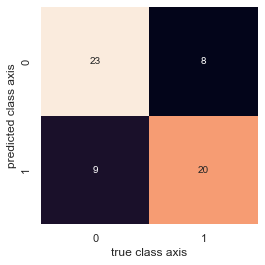

In [83]:
sb.heatmap(confusionmt.T, square = True, annot = True, fmt = 'd', cbar = False) 
pt.xlabel('true class axis') 
pt.ylabel('predicted class axis')